# Mini Batch Gradient Descent (from scratch)

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

We know that the prediction, $\hat{y}$ is defined as:

$$
\hat{y_i} = w_1x_i + w_2
$$

Also by definition we know that the Mean Square Error (MSE) is:

$$
Error = \frac{1}{2m}\sum_{i=1}^{m}(y_i-\hat{y_i})^2
$$

Then we find the derivative (slope) of the MSE depending on $w_i$:

$$
\frac{\partial Error}{\partial w_j} = \frac{\partial Error}{\partial \hat{y_i}}\frac{\partial \hat{y_i}}{\partial w_j}
$$

And therefore:

$$
\frac{\partial Error}{\partial w_1} = -\frac{1}{m}\sum_{i=1}^{m}(y_i-\hat{y_i})x_i
$$
$$
\frac{\partial Error}{\partial w_2} = -\frac{1}{m}\sum_{i=1}^{m}(y_i-\hat{y_i})
$$

In order to adjust the weights $w_j$ so the Error is minimized we should update them as follow:

$$
w_j \rightarrow w_j - \alpha \frac{\partial Error}{\partial w_j}
$$

The two weights *W_new* and *b_new* are updated in the following Python function:

In [176]:
def MSEStep(X, y, W, b, learn_rate=0.1):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.

    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """

    # compute errors
    y_pred = np.matmul(X, W) + b
    difference = y - y_pred

    # compute steps
    W_new = W + learn_rate * np.matmul(difference, X) / X.size
    b_new = b + learn_rate * difference.sum() / X.size

    return W_new, b_new

The gradient descent step will be performed multiple times on the provided dataset, and the returned list of regression coefficients will be plotted.

In [177]:
# Seed for choosing the batch points randomly
np.random.seed(42)

def miniBatchGD(X, y, batch_size=20, learn_rate=0.1, num_iter=25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1])  # coefficients
    b = 0  # intercept

    # run iterations
    regression_coef = [np.hstack((W, b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch, :]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W, b)))

    return regression_coef

## Load data

In [178]:
# Import data from CSV file
data = np.loadtxt('data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]
X_min = X.min()
X_max = X.max()
X_i = np.linspace(X_min, X_max, 100).reshape(100, 1)

## Mini batch GD from scratch 

In [179]:
regression_coef = miniBatchGD(X, y)

## Sklearn linear regression

In [180]:
linear_model = LinearRegression()
linear_model.fit(X, y)
y_linear = linear_model.predict(X_i)


## Sklearn polynomial regression

In [181]:
poly_feat = PolynomialFeatures(degree = 2)
X_poly = poly_feat.fit_transform(X)
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)
X_i_poly = poly_feat.transform(X_i)
y_poly = poly_model.predict(X_i_poly)


## Rendering figure

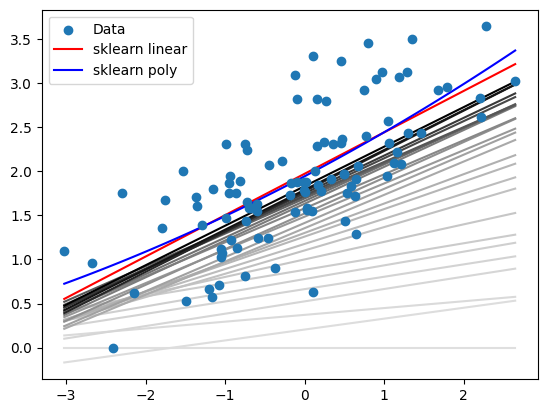

In [182]:
plt.figure()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3, label="Data")
plt.plot(X_i, y_linear, "r-", label="sklearn linear")
plt.plot(X_i, y_poly, "b-", label="sklearn poly")
plt.legend(loc="best")
plt.show()
